In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Mobile_data.csv")

In [7]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [8]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
Price            0
dtype: int64

In [9]:
df["Price"].value_counts()

Price
0    1000
1    1000
Name: count, dtype: int64

In [11]:
X = df.drop(columns="Price")
y = df["Price"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=88)

In [13]:
log = LogisticRegression()

In [14]:
log.fit(X_train,y_train)

LogisticRegression()

In [15]:
print("Train",log.score(X_train,y_train))
print("Test",log.score(X_test,y_test))

Train 0.89875
Test 0.8775


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
print("Train",knn.score(X_train,y_train))
print("Test",knn.score(X_test,y_test))

Train 0.98375
Test 0.9725


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scale = MinMaxScaler()

In [24]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [25]:
log.fit(X_train_scale,y_train)

LogisticRegression()

In [26]:
print("Train",log.score(X_train_scale,y_train))
print("Test",log.score(X_test_scale,y_test))

Train 0.98625
Test 0.98


In [53]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scale,y_train)
print("Train",knn.score(X_train_scale,y_train))
print("Test",knn.score(X_test_scale,y_test))

Train 0.941875
Test 0.9175


In [39]:
train = []
test = []

for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scale,y_train)
    train.append(knn.score(X_train_scale,y_train))
    test.append(knn.score(X_test_scale,y_test))

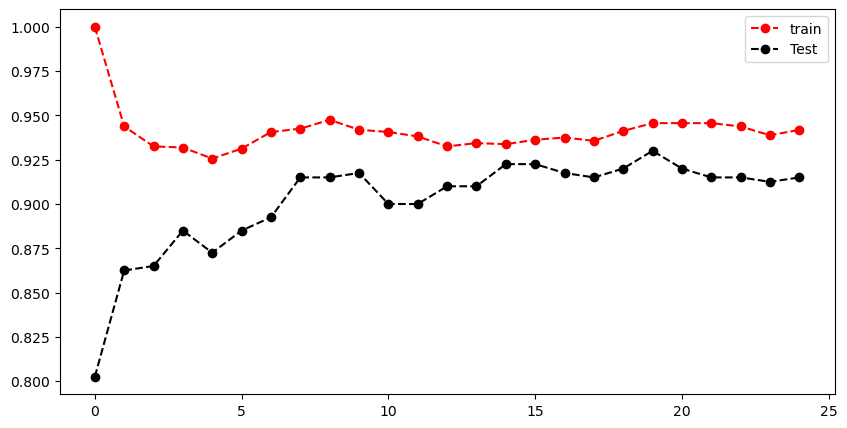

In [46]:
plt.figure(figsize=(10,5))
plt.plot(train,"o--",label="train",color = "r")
plt.plot(test,"o--",label="Test",color = "k")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_train,knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       799
           1       0.50      1.00      0.67       801

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



In [56]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       201
           1       0.50      1.00      0.66       199

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

